### 2D Finite Volume Method for Multi-Material Selective Laser Sintering 
### Abstract 
Selective Laser Sintering (SLS) is an Additive Manufacturing (AM) technique that sinters material powders together using a laser in a heated enclosure. Typically, SLS printing of thermoplastic polymers is done with one material. Technology advances have introduced the possibility of multi-material (M2) SLS printing involving more than one different thermoplastics being sintered in one print. M2 AM is an attractive domain of AM because of the potential to create highly-customizable mechanically-tailored structures for many industries.  However, differences in thermal properties between materals result in frequent print errors which create weakness in printed structures, poor dimensional stability, and aborted prints. This beckons a better understanding of the thermal mechanisms of the M2 SLS printing process. This report presents the preliminary calculations and modeling of a 2-dimensional (2D) M2 SLS print using finite volume method (FVM). 

### Introduction 

This report follows the assumptions made in Chen et al. (2010):
1. Melting and resolidification in SLS is a conduction-controlled phase-change
problem.
2. The thermal properties of the low-melting-point powder are the same for
both liquid and solid phases.
3. Two kinds of metal powders are fully mixed, and the initial porosity is
uniform.
4. The bottom of the computational domain for both cases is adiabatic.
5. The horizontal dimension of the powder layer is significantly larger than the
diameter of the laser beam.

The heat transfer mechanisms in SLS are complicated and involve all modes: conduction, convection, and radiation. Fourier heat conducion theory is commonly used to describe the SLS heat conduction evolution:

$\lambda(\frac{\partial^2T}{\partial x^2} + \frac{\partial^2T}{\partial y^2} + \frac{\partial^2T}{\partial z^2}) + q = \rho C \frac{\partial T}{\partial t}$

$(\frac{\delta T}{\delta t}) \approx \frac{T^{n+1} - T^n}{\Delta t} $

$(\frac{\partial^2T}{\partial x^2}) \approx \frac{T_{n+1,m} - 2T_{n,m} + T_{i,j-1}}{\Delta x^2}$

$(\frac{\partial^2T}{\partial y^2}) \approx \frac{T_{n+1,m} - 2T_{n,m} + T_{i,j-1}}{\Delta y^2}$

$(\frac{\partial^2T}{\partial z^2}) \approx \frac{T_{n+1,m} - 2T_{n,m} + T_{i,j-1}}{\Delta z^2}$

$\lambda(\frac{T_{n+1,m} - 2T_{n,m} + T_{i,j-1}}{\Delta x^2} + \frac{T_{n+1,m} - 2T_{n,m} + T_{i,j-1}}{\Delta y^2} + \frac{T_{n+1,m} - 2T_{n,m} + T_{i,j-1}}{\Delta z^2}) + q = \rho C \frac{T^{n+1} - T^n}{\Delta t} $

Boundary conditions: 

$-\lambda \frac{\partial T}{\partial z} = \epsilon_\theta \sigma (T^4 - T_e^4) + h(T - T_e)$

$-\lambda \frac{\partial T}{\partial z}|_{z=0} = 0$

$ T $ is the temperature, 
$ \lambda $ dimensionless shrinkage velocity,
$ \rho $ is the density of the powder,
$ C $ is the heat capacity coefficient,
$ q $ is the internal heat ,
$ T_0 $ is the powder bed initial temperature, 
$ T_e $ the environment temperature,
$ \epsilon_\theta $ is the thermal radiation coefficient,
$ \sigma $ is the Stefan-Boltzmann constant,
and $ h $ is the convection heat transfer coefficient, 

### Methodology 

$-U\frac{\partial(CT)}{\partial X} + W\frac{\partial(CT)}{\partial Z}= \frac{\partial}{\partial X}(K\frac{\partial(T)}{\partial X}) - (-U\frac{\partial S}{\partial X} + W\frac{\partial S}{\partial Z}) $



$ U $ is the laser scan speed, 
$ W $ is the dimensionless shrinkage velocity,
$ C $ is the heat capacity,
$ S $ is the source term,
and $ K $ is the thermal conductivity 

The values of the above parameters are dependent on whether the powder is in its loose unsintered form, or in it's resolidifed sintered form. For the loose unsintered form:



### Problem Definition 
### Results and Discussion 
### Conclusion 
### References 

[1] Kumar CFD [2]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import json

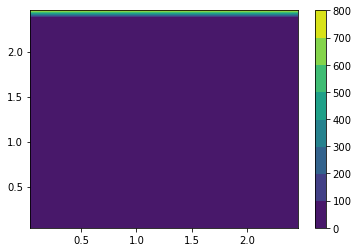

899


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import json
Lx=2.5; Ly=2.5; n = 30; m = 30; nn=n*m; # Geom descretization/mesh
Ta=500; Tb=500; Tc=500; Td=500; # BCs
k=0.12; Cp = 1185; rho = 1015;
delta_t = 60 # Properties
LP = 20000; SS = .200 ;
 
dx = Lx/n;  dy = Ly/m;   
x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])
dz=1;  G=k; q=LP*delta_t; #Added heat generation  

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sua=0*q*Aw; Sub=0*q*Ae; Suc=0*q*As; Sud=q*An; Sp=0; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy; a_0P = rho*Cp*dx*dy/delta_t
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            aW=0; Sp=Sp-2*G*Aw/dx; Su=Sua + 2*G*Aw/dx*Ta; #q*Aw*dx; #aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;
        
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            aE=0; Sp=Sp-2*G*Ae/dx; Su=Sub + 2*G*Ae/dx*Tb;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            aS=0; Sp=Sp-2*G*As/dy; Su=Suc + 2*G*As/dy*Tc;
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            aN=0; Sp=Sp-2*G*An/dy; Su=Sud + 2*G*An/dy*Td;
        
        aP = aW + aE + aS + aN + a_0P - Sp; 
        A[P,P] = aP; 
        b[P]=Su; 
        

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
        
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.colorbar()
plt.show()

print(IN)


